<a href="https://colab.research.google.com/github/PradeepkumarNR/BasicThingsInJava/blob/master/IP_Project_Question_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Write the problem statement and objectives here


### Data Dictionary

Mention the data dictionary here

### Let us start by importing the required libraries

In [14]:
# Write your code here to import necessary libraries for the project
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/Pythoncourse/foodhub_order.csv')

In [16]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
 * There are 6 numerical columns in the data and 4 object type columns.
* Rating column is being read as object type column but it should be numerical .



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
in the rating column, there is a string value NOT GIVEN going ahead considering it as a non missing value
There are no missing values in the entire data set


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:
Food preperation min time is 20 min
Maximum time is 35 min
Average time is 27.372 min

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
data['rating'].nunique()

4

In [10]:
data['rating'].describe()

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

In [6]:
data['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
736 orders are not rated.
588 are of rating 5
386 orders are of rating 4
188 are of rating 3

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [5]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


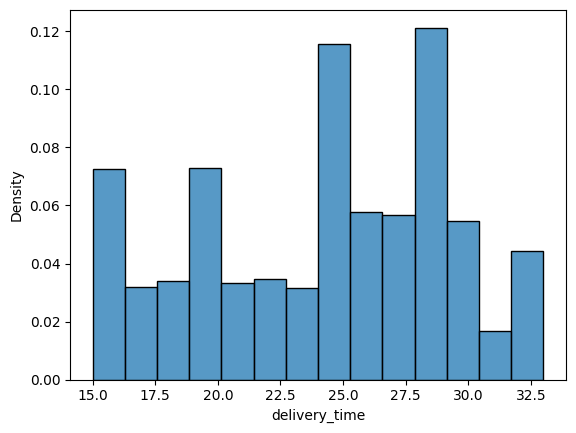

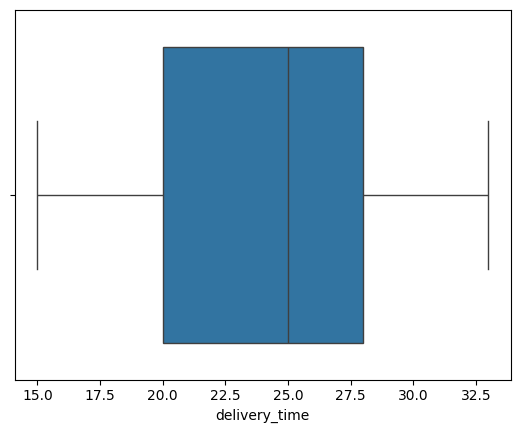

In [ ]:
sns.histplot(data=data,x='delivery_time',stat='density')
plt.show()
sns.boxplot(data=data,x='delivery_time')
plt.show()

Observations on delivery time- its evenly distributed
There are no outlayers as such
No sques either on left or right

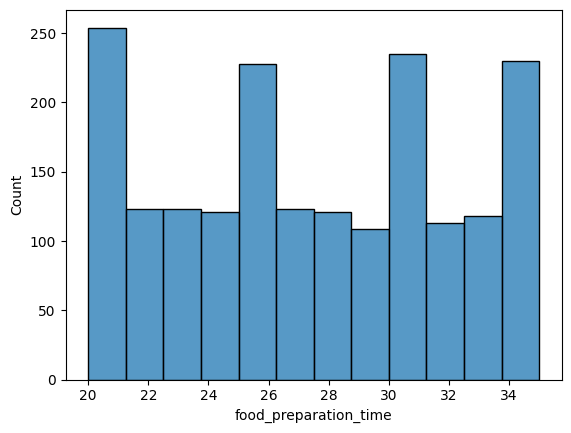

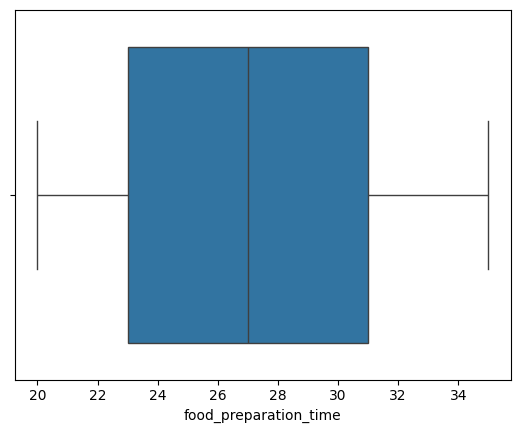

In [ ]:
sns.histplot(data=data,x='food_preparation_time')
plt.show()
sns.boxplot(data=data,x='food_preparation_time')
plt.show()

Observations on food preperation time:
1. Distribution is even no skwees seen
2. No out layers seen
3. we can see some spikes where most of the observations are made at 20th, 26th, 31st and 35th min, these spikes makes the distribution even

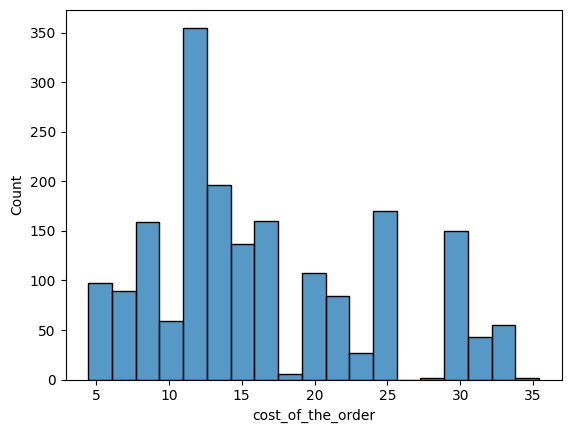

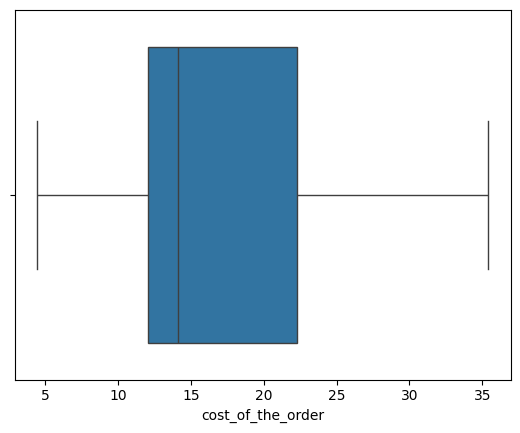

In [ ]:
sns.histplot(data=data,x='cost_of_the_order')
plt.show()
sns.boxplot(data=data,x='cost_of_the_order')
plt.show()

Observations on the cost of the order:
1. it appears to be right skweed, mean is almost closer to the first 25% of the values
2. 350 times the cost of the order is around $11 to $12 created a kind of spike

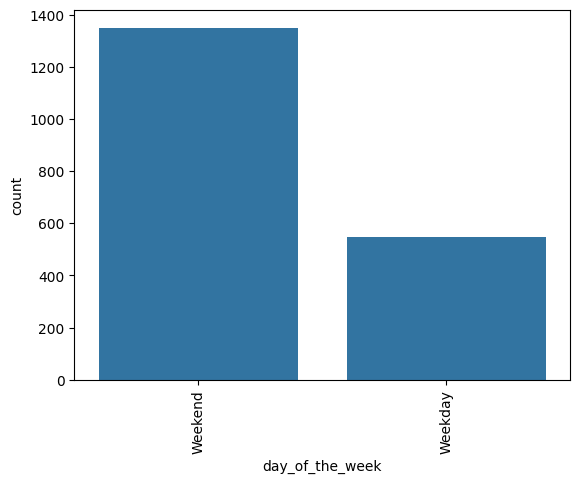

In [6]:
sns.countplot(data=data,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

Observations on day of the week.
1. Distribution is right skweed
2. Weekend orders are 3 times the weekday orders

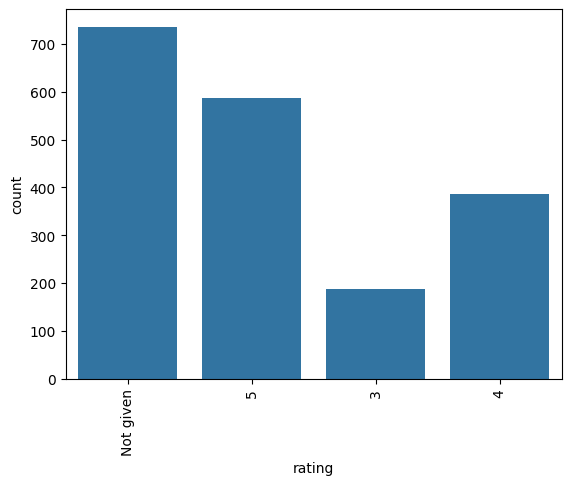

In [ ]:
sns.countplot(data=data,x='rating')
plt.xticks(rotation=90)
plt.show()

Observations on day of the rating:
1. Ratings are not given for almost 40% of the observations, individually that is the highest count
2. Next comes the rating 5 in the number of observations

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [13]:
data['restaurant_name'].value_counts()


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

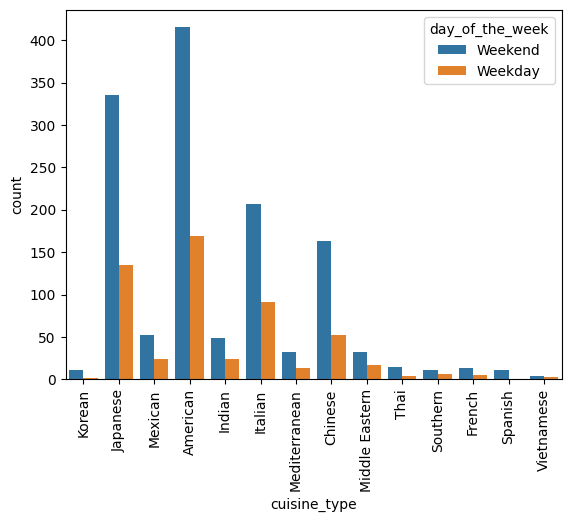

In [8]:
sns.countplot(data=data,x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations:
1. American cuisine is most popular during the weekend as well as weekday.
2. Japanese cuisine is next to American cuisine both for week day and weekend as well.
3. Vietnamese is the least for weekend


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [25]:
filtered_order=data[data['cost_of_the_order']>20]
count = filtered_order.shape[0]
print(count)
total_order= data.shape[0]
count_percentage= (count/total_order)*100
count_percentage

555


29.24130663856691

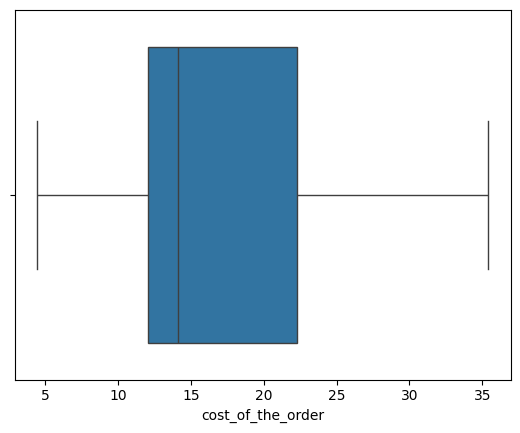

In [27]:
sns.boxplot(data=data,x='cost_of_the_order')
plt.show()

#### Observations:
1. From math operation almost 30% of the orders are having a value of $20
2. Also from box plot we can see that $20 orders start some where around 70% of the box.
3. 50 % of the orders are above $14


### **Question 10**: What is the mean order delivery time? [1 mark]

In [7]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


In [6]:
data['delivery_time'].mean()

24.161749209694417

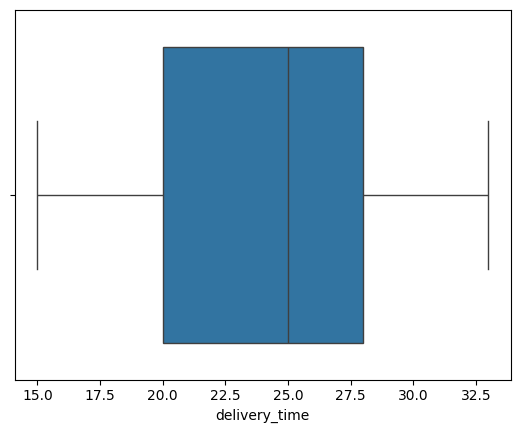

In [7]:
sns.boxplot(data=data,x='delivery_time')
plt.show()

#### Observations:
Mean value for order delivery time is 24.162 min

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [8]:
df = pd.DataFrame(data)
customer_counts = df['customer_id'].value_counts()
top_3_customers = customer_counts.head(3)
top_3_customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

In [20]:
df = pd.DataFrame(data)
customer_counts = df['customer_id'].value_counts()
top_3_customers = customer_counts.nlargest(3)
top_3_customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

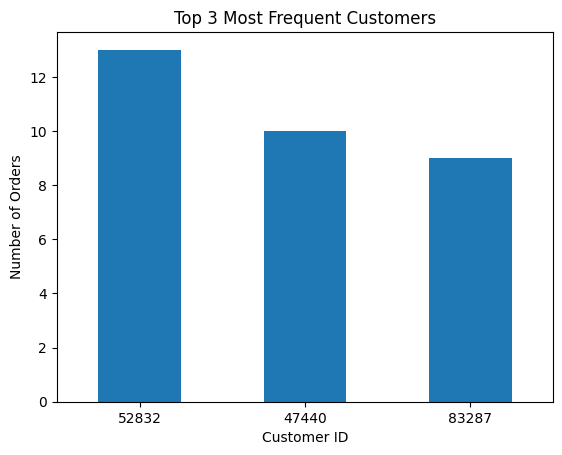

In [23]:

top_3_customers.plot(kind='bar')
plt.title('Top 3 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

#### Observations:

1. these are the top 3 customers
2. with customer id customer_id

      52832   
      47440    
      83287     
3. they have placed orders 13, 10 and 9 times respectively


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Created a column called total time taken from ordering to delivering the food and its added to the data set

In [13]:
data['Total_time'] = data['food_preparation_time'] + data['delivery_time']
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,49


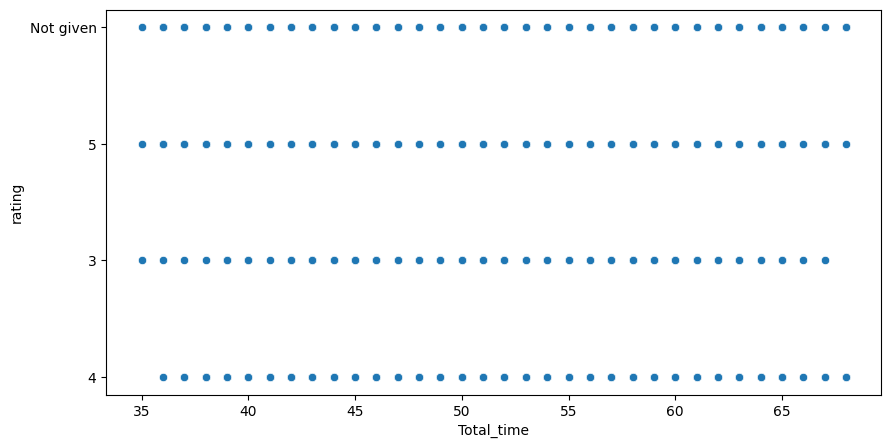

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Total_time',y='rating')
plt.show()

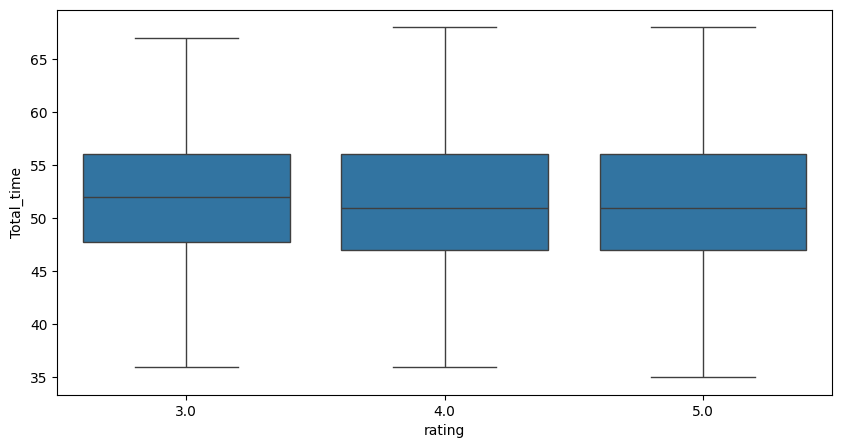

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='rating',y='Total_time',showfliers=False) # turning off outliers
plt.show()

Analysing which restaurent has got 5 ratings max

In [72]:
Top_rating = data[data['rating'] == 5]
most_five_ratings = Top_rating['restaurant_name'].value_counts().idxmax()
count_most_five_ratings = Top_rating['restaurant_name'].value_counts().max()
print (most_five_ratings)
print(count_most_five_ratings)


Shake Shack
60


Analyzing which restaurent has got most 3 rating

In [73]:
low_rating = data[data['rating'] == 3]
most_five_ratings = low_rating['restaurant_name'].value_counts().idxmax()
count_most_five_ratings = low_rating['restaurant_name'].value_counts().max()
print (most_five_ratings)
print(count_most_five_ratings)

Shake Shack
23


Observation on rating Vs total time taken to deliver:
1. Rating is not solely dependent on total time taken to deliver the food
2. even quickest time taken also have got less rating and larger time taken have good good ratings. - scatter plot
3. Avg time taken is slightly high in the deliveries which has got rating 3
4. Shake shack has got 5 ratings 60 times - it has got max among the list of restaurents. At the same time it has 3 ratings 23 times, thats max times among the list of restaurent.

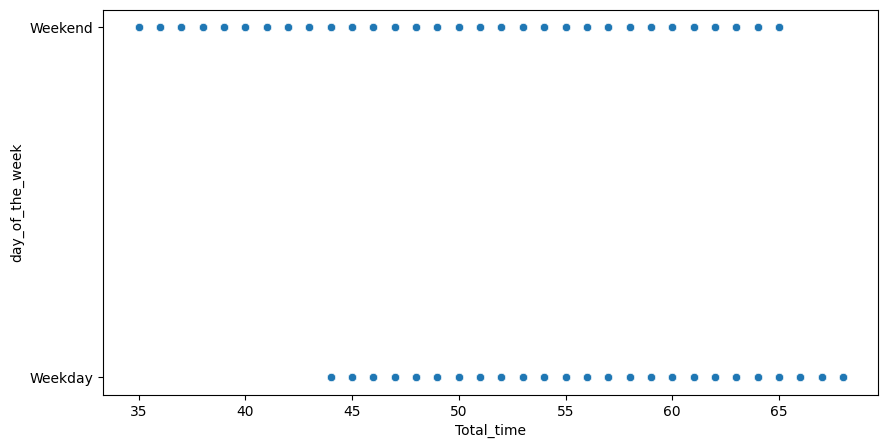

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Total_time',y='day_of_the_week')
plt.show()

Observation on total time taken Vs day of the week.
1. Weekday total times are starting from nearly 45 min
2. Weekend time lines look quikcer and faster


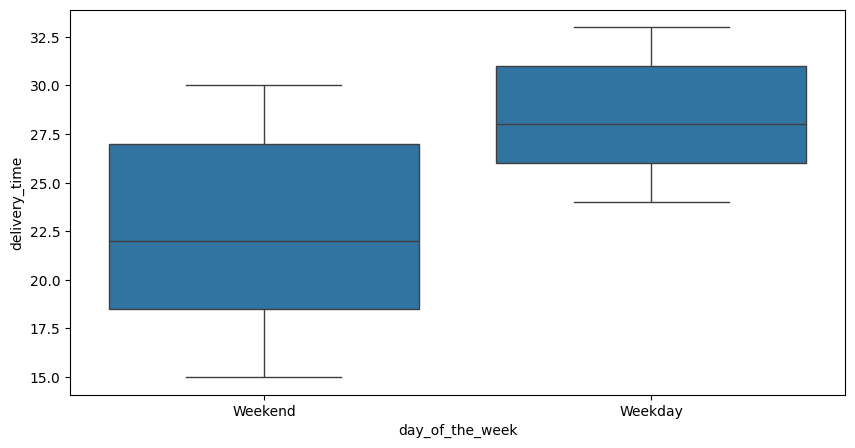

In [66]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='day_of_the_week',y='delivery_time',showfliers=False) # turning off outliers
plt.show()

Observation on delivery time and day of the week.
1. Delivery times are Quicker in weekend and avg is 22 min
2. During weekdays avg value is 28 min approx
3. During weekends we can see delivery time is not exceeding 30 min
4. During weekdays its marginally high 33 min approx

In [11]:

# Which restuarent is opted most during the weekends
weekend_orders = data[data['day_of_the_week'] == 'Weekend']

restaurant_counts = weekend_orders['restaurant_name'].value_counts()

most_opted_restaurant = restaurant_counts.idxmax()
most_opted_count = restaurant_counts.max()
print(most_opted_restaurant)
print(most_opted_count)

Shake Shack
145


Observation on the most opt restaurent:
Shake shack has been the most opted restaurent in weekends

### Checking the relationship between restaurant name and the rating it has got

In [12]:
unique_restaurants = df['restaurant_name'].nunique()
print(unique_restaurants)

178


There are 178 unique restaurents listed

In [31]:
data['rating'] = pd.to_numeric(data['rating'])
data = data.replace(to_replace='Not given', value=np.nan)

rating_counts = data.groupby('rating')['restaurant_name'].nunique().reset_index()

# Rename the columns for clarity
rating_counts.columns = ['Rating', 'Number of Restaurants']

# Display the result
print(rating_counts)

   Rating  Number of Restaurants
0   3.000                     65
1   4.000                     95
2   5.000                    121


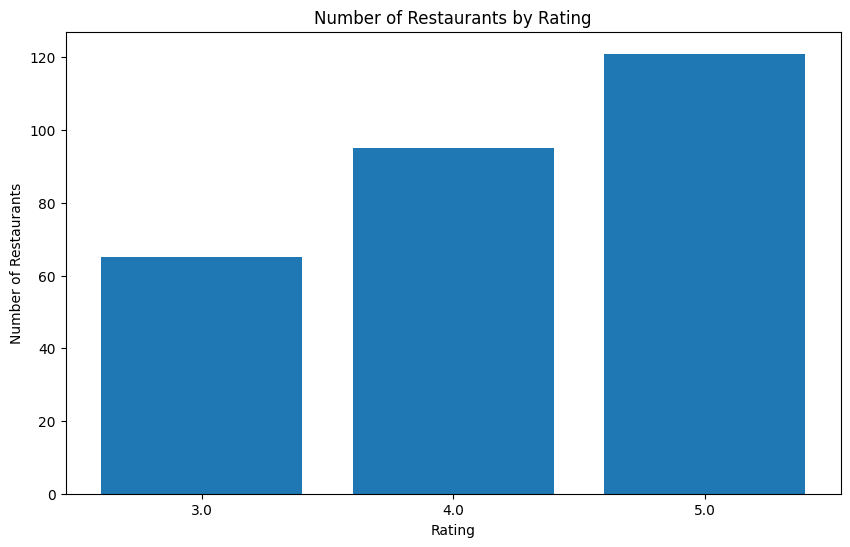

In [34]:

plt.figure(figsize=(10, 6))
plt.bar(rating_counts['Rating'].astype(str), rating_counts['Number of Restaurants'])
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants by Rating')
plt.show()

Observations:
1. In the data set we can see 281 times restaurents have been rated with 3, 4 and 5 and these are unique valued restaurent names
2. There is a possibitlity of same restaurent rated differently in another instance

Lets look at the cost of the order and the rating - considering $20 dollars as the significant high cost order.

In [81]:
total_orders = data.shape[0]
total_orders

1898

In [85]:


high_cost_orders = data[data['cost_of_the_order'] >= 20]
num_high_cost_orders = high_cost_orders.shape[0]
print(num_high_cost_orders)
percentage = (num_high_cost_orders/total_orders)*100
print(percentage)

555
29.24130663856691


Obsrvations:
There are 555 high cost orders or the total 1898 orders, which is nearly 30 percent of the total orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [33]:


data['rating'] = pd.to_numeric(data['rating'])
data = data.replace(to_replace='Not given', value=np.nan)
rating_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()
filtered_restaurants = rating_stats[(rating_stats['count'] > 50) & (rating_stats['mean'] > 4)].head(3)
print(filtered_restaurants)

               restaurant_name  count  mean
20   Blue Ribbon Fried Chicken     64 4.328
21           Blue Ribbon Sushi     73 4.219
136                Shake Shack    133 4.278


#### Observations:

1. Blue Ribbon Fried Chicken has been rated 64 times and avg is 4.328
2. Blue Ribbon Sushi has been rated 73 times and avg is 4.219
3. Shake Shack has been rated 133 times and the avg is 4.278
4. These three Restaurents are rated 270 times with different ratings - excluding 'not given'


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

Here it will be good to define a function to calculate the total revenue based on the charges

In [43]:
data['revenue'] = data['cost_of_the_order']
total_revenue = data['revenue'].sum()
total_revenue

31314.82

In [45]:
def calculate_charges(order_cost):
    if order_cost > 20:
        return order_cost * 0.25
    elif order_cost > 5:
        return order_cost * 0.15
    else:
        return 0

data['revenue'] = data['cost_of_the_order'].apply(calculate_charges)

total_net_revenue = data['revenue'].sum()
print(total_net_revenue )
print(f"The net revenue generated by the company is: ${total_net_revenue}")

6166.303
The net revenue generated by the company is: $6166.303


#### Observations:
1. Before applying charges  the total revenue of the company was
"$31314.82"

2. Additional charges when applied company will get a revenue of "$6166"

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

Earlier for we have calculated the total time taken, in above instances of analyses. Lets continue from there

In [47]:
data['Total_time'] = data['food_preparation_time'] + data['delivery_time']
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,Total_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,NaN,25,20,7.688,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,NaN,25,23,1.812,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5.000,23,28,1.835,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3.000,25,15,7.300,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4.000,25,24,1.738,49


In [53]:
orders_moreThan_60_minutes = data[data['Total_time'] > 60].shape[0]
orders_moreThan_60_minutes

200

In [60]:
percentage_OrdersMorethan_60Min = (orders_moreThan_60_minutes / df.shape[0])*100

percentage_OrdersMorethan_60Min

10.537407797681771

#### Observations:
1. There are 200 orders which are taking more than 60 min
2. about 10.5 % of orders are having a total delivery time above 60 min


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

Lets calculate delivery time during weekdays and weekends

In [63]:
weekday_only_delivery=data[data['day_of_the_week']=='Weekday']
MeanTime_ForWeekDay=weekday_only_delivery['delivery_time'].mean()
MeanTime_ForWeekDay

28.340036563071298

In [64]:
weekend_only_delivery=data[data['day_of_the_week']=='Weekend']
MeanTime_ForWeekend=weekend_only_delivery['delivery_time'].mean()
MeanTime_ForWeekend

22.4700222057735

#### Observations:
1. Wekend deliveries are more faster compared to Week days
2. Weekdays its 28 min approximately
3. Weekends its 22 min approximately

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Delivery Time on Weekdays vs. Weekends:

The mean delivery time differs between weekdays and weekends. By calculating and comparing these times, we find that weekdays few instances has significantly higher delivery times.

* Ratings vary across different restaurants and cuisines. Analyzing these ratings helps identify popular and well-received restaurants and those needing improvement.
          a. American cuisine is most popular
          b. shack shake is the most popular restaurent
* Revenue
        a. There are 555 high cost orders or the total 1898 orders, which is nearly 30 percent of the total orders.

* Order Duration:

A certain percentage of orders take more than 60 minutes to deliver, which might indicate potential delays in either food preparation or delivery.

### Recommendations:

*  Optimize Delivery Times:

    a.Weekday vs. Weekend: If delivery times are longer on weekends, consider increasing the number of delivery people or using faster transportation methods to reduce delays.
    b. High Delay Orders: think about orders that take more than 60 minutes to identify common factors causing delays. see if it can be improved  some optimization is requird in food prep time and optimizing routes
* Enhance Customer Experience Based on Feedback:

    Encourage high rated restaurants to maintain their quality.
    Improvement Plans for Low-Rated Restaurants check if food quality, preparation time, or customer service needs to be improved
* Leverage Cuisine Popularity:

    Promote cuisines that are popular and have high ratings (e.g., American, Japanese).
    Underperforming Cuisines: Work on marketing strategies to boost less popular cuisines. Offer promotions or discounts to attract customers.

  * Implement loyalty programs for frequent customers, offering rewards for repeat orders, which can increase customer retention and satisfaction.
  Data-Driven Decision Making:

Regularly analyze customer feedback, delivery times, and order values to identify trends and areas for improvement. Use this data to make informed decisions on operations and marketing strategies.